## Examples for Lecture 10
# Lab 10.1: Dimensional reduction

In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.datasets import make_friedman1
import sklearn.decomposition as skd

In [2]:
""" 
Make sparse data set
in 3 dimensions. Observations lie on two 
axes (group)
""" 
N = 30
P = 3 
numComp=2 
group=np.random.randint(2,size=N)
Z=np.zeros((N,P))
Z[:,0]=group
Z[:,1]=1-group
Latent=np.random.uniform(-1,1,(N,P))*Z
Noise=np.random.normal(0,0.1,(N,P))
A = np.array([[0.7,-0.7,0],[0.7,0.7,0],[0,0,0]])
B = np.array([[0.8,0.3,0],[0.2,0.7,0],[0,0,2]])
Y=Latent@A+Noise@B

In [3]:
Y

array([[ 0.02017648, -0.05790074,  0.06031001],
       [ 0.1530921 ,  0.14297449,  0.17133329],
       [ 0.40495497, -0.43069114, -0.09965637],
       [-0.14108764, -0.18352112, -0.14175893],
       [-0.17390319, -0.23450345, -0.0964477 ],
       [ 0.42948325, -0.16109293,  0.12958737],
       [ 0.02209896, -0.05494017,  0.22259621],
       [ 0.14215683, -0.20198801,  0.14958865],
       [ 0.13230558, -0.21782262,  0.21903753],
       [-0.53542911,  0.51496404, -0.00643801],
       [-0.33113627, -0.31608687, -0.07120582],
       [ 0.75381804,  0.68959472, -0.01136353],
       [-0.26288525,  0.22905577, -0.13398827],
       [-0.09614486, -0.09993702,  0.0070133 ],
       [ 0.18644525,  0.06425768,  0.28199235],
       [-0.63440913,  0.66398855, -0.12400738],
       [ 0.19426877, -0.43160483,  0.14945326],
       [-0.06305018, -0.16471336,  0.20743644],
       [-0.27061015,  0.35962487, -0.23126957],
       [-0.46024195, -0.49525593, -0.02677118],
       [ 0.06011096,  0.10668801,  0.149

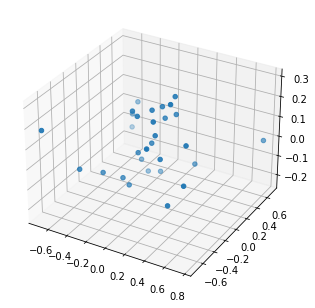

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y[:,0],Y[:,1],Y[:,2])

(30, 2)
(30,)


array([0.13660591, 0.11274098])

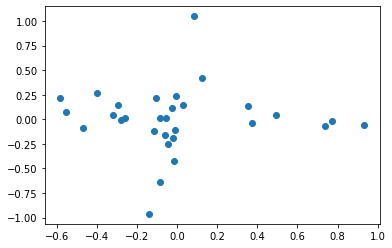

In [9]:
# Do normal PCA on the data set 
nPCA = skd.PCA(n_components=2)
nPCA.fit(Y)
nPCA.explained_variance_
Z1 = nPCA.transform(Y)
print(Z1.shape)
plt.scatter(Z1[:,0],Z1[:,1])
print(Z1[:,0].shape)
nPCA.components_
nPCA.explained_variance_

array([[ 0.,  1.,  0.],
       [-1.,  0.,  0.]])

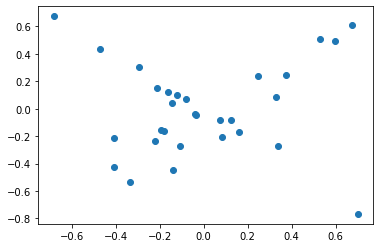

In [6]:
# Now do sparse PCA (Y= ZV), inforcing sparseness on V - that means 
# only a few of the original variables should on each latent factor 
sPCA = skd.SparsePCA(n_components=2,random_state=0,alpha=0.5)
sPCA.fit(Y) 
Z2 = sPCA.transform(Y)  # This are the the Z  
plt.scatter(Z2[:,0],Z2[:,1])
#Z2.shape
sPCA.components_ # This is V 

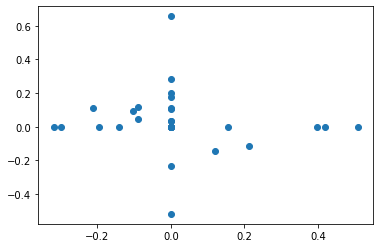

In [7]:
# Now to sparse PCA (Y = ZV), with L1- penalty on Z. 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA
# Since Sklearn imposes the Penalty on V by default, we transform the problem 
# Y = Z V (Y_old.T = V_old.T Z_old.T)
# You can now play around with alpha 
sPCA = skd.SparsePCA(n_components=2,random_state=0,alpha=0.1)
sPCA.fit(Y.T) 
Z3 = sPCA.components_.T  # These are now the Z in the new space
plt.scatter(Z3[:,0],Z3[:,1])